## About Dataset ##
-- Context --
This dataset contains the images of diesased and fresh cotton leafs and plants.

-- Content --
The dataset is divided into three sub directories of train test and validation.each with each of the classes like diseased or fresh.

you can find data in kaggele https://www.kaggle.com/datasets/ananysharma/diseasecotton

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
base_dir = "data"
splits = ["train", "val", "test"]
classes = ["fresh cotton leaf", "fresh cotton plant", 
           "diseased cotton leaf", "diseased cotton plant"]


In [4]:
for split in splits:
    print(f"--- {split.upper()} ---")
    split_dir = os.path.join(base_dir, split)
    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)
        count = len(os.listdir(cls_dir))
        print(f"{cls}: {count} images")


--- TRAIN ---
fresh cotton leaf: 427 images
fresh cotton plant: 421 images
diseased cotton leaf: 288 images
diseased cotton plant: 815 images
--- VAL ---
fresh cotton leaf: 80 images
fresh cotton plant: 88 images
diseased cotton leaf: 55 images
diseased cotton plant: 101 images
--- TEST ---
fresh cotton leaf: 5 images
fresh cotton plant: 5 images
diseased cotton leaf: 3 images
diseased cotton plant: 5 images


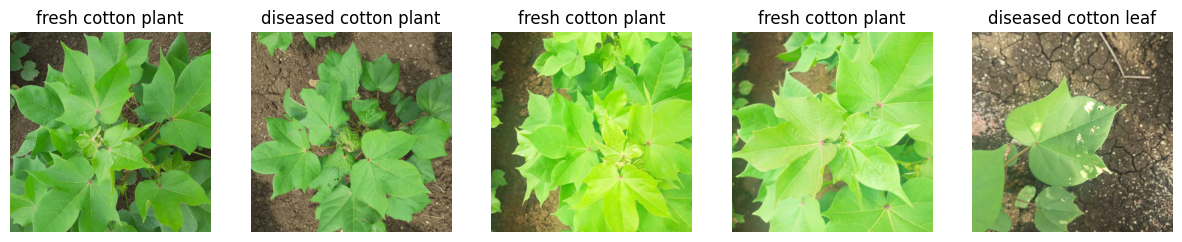

In [6]:
import random

def show_random_images(split="train", n=5):
    split_dir = os.path.join(base_dir, split)
    plt.figure(figsize=(15,5))
    
    for i in range(n):
        cls = random.choice(classes)
        cls_dir = os.path.join(split_dir, cls)
        img_file = random.choice(os.listdir(cls_dir))
        img_path = os.path.join(cls_dir, img_file)
        
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.show()

# Show 5 random images from train set
show_random_images("train", 5)


In [8]:
import cv2


def is_blurry(img_path, thresh=100):
    img = cv2.imread(img_path, 0)
    return cv2.Laplacian(img, cv2.CV_64F).var() < thresh

# Example: Check proportion of blurry images in training set
def blurry_images_in_split(split="train", thresh=100):
    split_dir = os.path.join(base_dir, split)
    total = 0
    blurry = 0
    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)
        for img_file in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_file)
            total += 1
            if is_blurry(img_path, thresh):
                blurry += 1
    print(f"{split} - Blurry images: {blurry}/{total} ({blurry/total:.2%})")

# Apply to train and val splits
blurry_images_in_split("train")
blurry_images_in_split("val")


train - Blurry images: 344/1951 (17.63%)
val - Blurry images: 72/324 (22.22%)


Blurry Image Detection

To evaluate the visual clarity of the dataset, the Laplacian variance method was applied to all images in both training and validation sets.

Interpretation

A significant portion of the dataset contains blurry images (above 10%).

The validation set is more blurry than the training set.

This may negatively affect model performance because:

CNNs struggle with low-detail inputs.

Validation accuracy may be misleading due to poor-quality samples.

The model might learn noise or background patterns instead of leaf texture.

In [8]:
def get_image_sizes(split="train"):
    split_dir = os.path.join(base_dir, split)
    widths, heights = [], []
    
    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)
        for img_file in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_file)
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
    return widths, heights

widths, heights = get_image_sizes("train")
print(f"Width: min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.1f}")
print(f"Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.1f}")




Width: min=617, max=924, mean=664.9
Height: min=520, max=694, mean=664.5


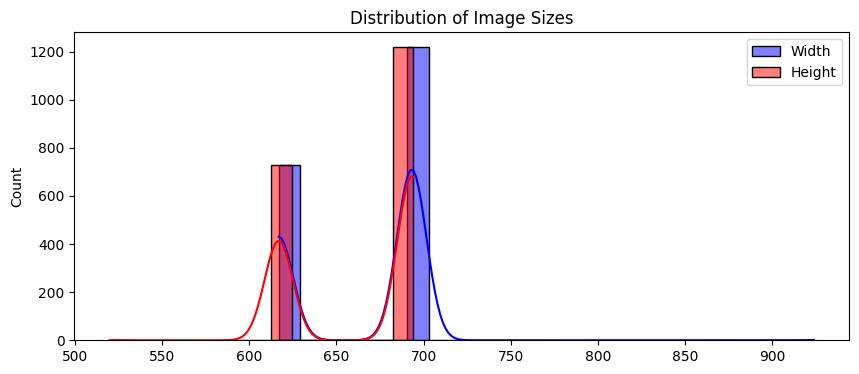

In [9]:
# Plot distribution
plt.figure(figsize=(10,4))
sns.histplot(widths, color='blue', label='Width', kde=True)
sns.histplot(heights, color='red', label='Height', kde=True)
plt.legend()
plt.title("Distribution of Image Sizes")
plt.show()

🖼️ Image Resolution Summary

Width: min = 617 px, max = 924 px, mean = 664.9 px

Height: min = 520 px, max = 694 px, mean = 664.5 px

Interpretation

The dataset has non-uniform image sizes, which is expected in real-world leaf datasets.

Most images are roughly square-shaped, which is ideal for CNN preprocessing.

A consistent input size must be selected before training.

In [10]:
def check_corrupted(split="train"):
    split_dir = os.path.join(base_dir, split)
    corrupted = []
    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)
        for img_file in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_file)
            try:
                img = Image.open(img_path)
                img.verify()  # will raise an exception if corrupted
            except:
                corrupted.append(img_path)
    return corrupted

corrupted_images = check_corrupted("train")
print(f"Corrupted images: {corrupted_images}")


Corrupted images: []


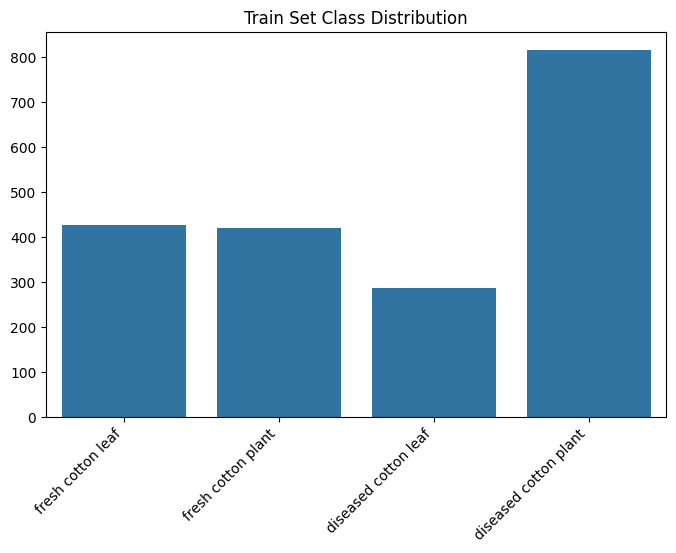

In [11]:
counts = []
for cls in classes:
    cls_dir = os.path.join(base_dir, "train", cls)
    counts.append(len(os.listdir(cls_dir)))

plt.figure(figsize=(8,5))
sns.barplot(x=classes, y=counts)
plt.xticks(rotation=45, ha='right')
plt.title("Train Set Class Distribution")
plt.show()
